In [ ]:
# Do not delete yet, to be deleted later

In [1]:
%load_ext autoreload
%autoreload 2

from Satellite import Satellite
from SatelliteState import SatelliteState
import numpy as np
from Filter import LinearKalmanFilter
from Earth import Earth

true_state0 = SatelliteState(np.array([2,1,1]), np.zeros(1), np.array([0.1,0.1,0.1]), np.array([0,0,0]))
prior_cov = np.array([[1,0,0], [0,1,0], [0,0,1]])
prior_state = SatelliteState(np.array([0.9,1.1,1]), prior_cov, np.array([0.1,0.1,0.1]), np.array([0,0,0]))


earth = Earth()
print(earth.air_density(100))

sat1 = Satellite(true_state0, prior_state, LinearKalmanFilter, earth)



1.2105623305293947


In [2]:
sat1.true_state

SatelliteState(pos=array([2, 1, 1]), cov=array([0.]), velocity=array([0.1, 0.1, 0.1]), acceleration=array([0, 0, 0]))

In [3]:
%load_ext autoreload
%autoreload 2

sat1.earth.air_density(100)
sat1.update_true_state()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
sat1.true_state

SatelliteState(pos=array([2.1, 1.1, 1.1]), cov=array([0.]), velocity=array([0.1, 0.1, 0.1]), acceleration=array([0, 0, 0]))

In [5]:
sat1.recorded_true_states

[SatelliteState(pos=array([2, 1, 1]), cov=array([0.]), velocity=array([0.1, 0.1, 0.1]), acceleration=array([0, 0, 0])),
 SatelliteState(pos=array([2.1, 1.1, 1.1]), cov=array([0.]), velocity=array([0.1, 0.1, 0.1]), acceleration=array([0, 0, 0]))]

In [6]:
sat1.estimated_state

SatelliteState(pos=array([0.9, 1.1, 1. ]), cov=array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]), velocity=array([0.1, 0.1, 0.1]), acceleration=array([0, 0, 0]))

In [7]:
sat1.estimated_state.get_state()

array([0.9, 1.1, 1. , 0.1, 0.1, 0.1, 0. , 0. , 0. ])

In [8]:
sat1.filter.m

array([0.9, 1.1, 1. , 0.1, 0.1, 0.1, 0. , 0. , 0. ])

In [9]:
sat1.update_estimated_state()

[0.9 1.1 1.  0.1 0.1 0.1 0.  0.  0. ]
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 9)

In [184]:
%load_ext autoreload
%autoreload 2
import utilities
from Earth import Earth
import numpy as np


earth = Earth()
points = utilities.random_points_on_ellipse(earth, 1000)
a = 20
sigma = 100*np.array([[1.,0.5],[0.5,1.]])
D = 100000000

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [186]:
utilities.distance_on_surface(points[5], points[18])

2890514.37284254

In [187]:
test_point = points[0]

density = 0

for point in points:
    d = utilities.distance_on_surface(test_point, point)
    if d <= D:
        pass
        density += utilities.population_density(test_point, point,  a, sigma)

In [188]:
# Create a grid
n = 50
x_values = np.linspace(test_point[1] - n, test_point[1] + n, 500)
y_values = np.linspace(test_point[2] - n, test_point[2] + n, 500)
points = [[x_values[i], y_values[i]] for i in range(len(x_values))]
X, Y = np.meshgrid(x_values, y_values)
Z = np.zeros((len(x_values), len(y_values)))

In [189]:
for i in range(len(x_values)):
    for j in range(len(y_values)):
        point = [x_values[i], y_values[j]]
        Z[j, i] = utilities.population_density(point, test_point, a, sigma)

In [190]:
x_values.min()

-48.82281656803419

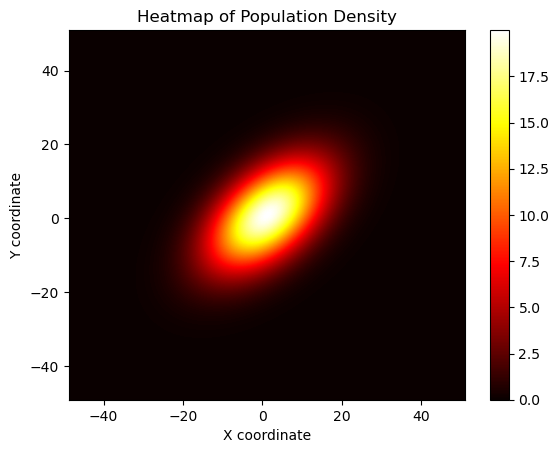

In [191]:
import matplotlib.pyplot as plt
plt.imshow(Z, extent=[x_values.min(), x_values.max(), y_values.min(), y_values.max()], origin='lower', cmap='hot', aspect='auto')
plt.colorbar()  # Show color scale
plt.title('Heatmap of Population Density')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()